## Table of Contents
  - 01. Importing libraries
  - 02. Importing data
  - 03. Data Preparation
    - 03.01. Remove data that is not needed for the analysis
    - 03.01. Filter data that is not needed for visual analysis
  - 04. Visual analysis
    - 04.01 Heatmap
    - 04.02 Offset inflation by one year
    - 04.03 Scatterplots
    - 04.04. Pair plots
    - 04.05 Categorical Plots
        - 04.05.01. Assigning categories
      - 04.05.02. Categorical visualizations
  - 05. Export data
  - 06. Hypotheses and additional research questions


## 01. Importing libraries

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 02. Importing data

In [6]:
path  = r'INSERT-YOUR-PATH'

In [7]:
#Importing data as wh
wh_df = pd.read_pickle(os.path.join(path, '01 Data', 'Prepared Data', 'dataset-2024-12-02.pkl'))

## 03. Data Preparation

In [9]:
wh_df

,Country,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Pos_affect,Neg_affect,Democracy,Inflation,_merge
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258,3.02,26.418664,both
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237,NaN,NaN,left_only
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275,2.48,2.178538,both
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267,2.48,11.804186,both
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268,2.48,6.441213,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235,3.16,255.304991,both
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346,3.16,557.201817,both
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242,2.92,98.546105,both
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191,2.92,104.705171,both


In [10]:
#Creating frequency table for Year
wh_df['Year'].value_counts(dropna = False)

Year
2017    147
2011    146
2014    144
2019    143
2015    142
2012    141
2016    141
2018    141
2022    140
2023    138
2013    136
2010    124
2021    122
2020    116
2009    114
2008    110
2007    102
2006     89
2005     27
Name: count, dtype: int64

In [11]:
#Order frequency table by year
wh_df['Year'].value_counts(dropna=False).sort_index(ascending=True)

Year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    141
2013    136
2014    144
2015    142
2016    141
2017    147
2018    141
2019    143
2020    116
2021    122
2022    140
2023    138
Name: count, dtype: int64

In [12]:
#Check for Duplicates
dups_df = wh_df[wh_df.duplicated()]

In [13]:
dups_df.drop_duplicates()

,Country,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Pos_affect,Neg_affect,Democracy,Inflation,_merge


No duplicates found

In [15]:
wh_df.shape

(2363, 14)

### 03.01. Remove data that is not needed for the analysis

Remove data from 2005-2007 because a lot of data is missing for those years. Some of the data was only captured in 2006 and 2008, so 2008 appears to be a better starting point for the analysis.

In [18]:
#Create year mask for NOT 2005-2007
year_mask = ~wh_df['Year'].isin([2005, 2006, 2007])

In [19]:
# Apply mask and create a new dataframe
wh_df_filtered = wh_df[year_mask].copy()

In [20]:
#Creating frequency table for Year
wh_df_filtered['Year'].value_counts(dropna = False)

Year
2017    147
2011    146
2014    144
2019    143
2015    142
2012    141
2016    141
2018    141
2022    140
2023    138
2013    136
2010    124
2021    122
2020    116
2009    114
2008    110
Name: count, dtype: int64

In [21]:
wh_df

,Country,Year,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Pos_affect,Neg_affect,Democracy,Inflation,_merge
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258,3.02,26.418664,both
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237,NaN,NaN,left_only
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275,2.48,2.178538,both
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267,2.48,11.804186,both
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268,2.48,6.441213,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235,3.16,255.304991,both
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346,3.16,557.201817,both
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242,2.92,98.546105,both
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191,2.92,104.705171,both


In [22]:
wh_df_filtered.shape

(2145, 14)

In [23]:
#Save filtered data as pickle for future reference
wh_df_filtered.to_pickle(os.path.join(path, '01 Data','Prepared Data', 'dataset_08-23_2024-12-13.pkl'))

### 03.01. Filter data that is not needed for visual analysis

In [25]:
wh_df_filtered.columns

Index(['Country', 'Year', 'Happiness', 'GDP_log', 'Social_support',
       'Life_expectancy', 'Freedom', 'Generosity', 'Corruption', 'Pos_affect',
       'Neg_affect', 'Democracy', 'Inflation', '_merge'],
      dtype='object')

In [26]:
# Keep only the variables that are interesting for visual analysis
df_wh_2 = wh_df_filtered[['Happiness', 'GDP_log', 'Social_support', 'Life_expectancy', 'Freedom', 'Generosity', 'Corruption', 'Democracy', 'Inflation']]

## 04. Visual analysis

In [28]:
# Create a correlation matrix using pandas
df_wh_2.corr()

,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Democracy,Inflation
Happiness,1.000000,0.780716,0.727366,0.723019,0.535176,0.171065,-0.423458,0.612153,-0.197355
GDP_log,0.780716,1.000000,0.687943,0.827529,0.359151,0.001535,-0.352524,0.611618,-0.153033
Social_support,0.727366,0.687943,1.000000,0.609754,0.406494,0.068906,-0.222333,0.509585,-0.106623
Life_expectancy,0.723019,0.827529,0.609754,1.000000,0.373172,0.019676,-0.307289,0.571113,-0.122725
Freedom,0.535176,0.359151,0.406494,0.373172,1.000000,0.317121,-0.456130,0.377006,-0.147634
Generosity,0.171065,0.001535,0.068906,0.019676,0.317121,1.000000,-0.264202,0.100289,-0.008995
Corruption,-0.423458,-0.352524,-0.222333,-0.307289,-0.456130,-0.264202,1.000000,-0.283372,0.073621
Democracy,0.612153,0.611618,0.509585,0.571113,0.377006,0.100289,-0.283372,1.000000,-0.154434
Inflation,-0.197355,-0.153033,-0.106623,-0.122725,-0.147634,-0.008995,0.073621,-0.154434,1.000000


### 04.01 Heatmap

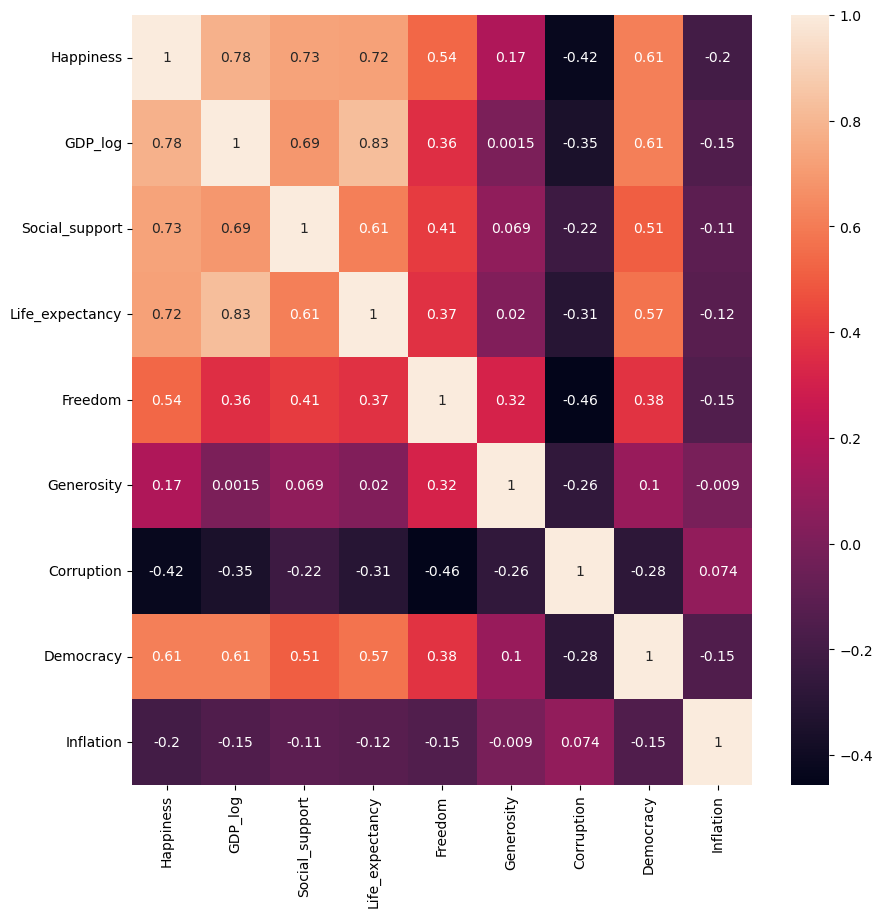

In [30]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_wh_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

#Save heatmap to directory
plt.savefig(os.path.join(path, 'correlation_heatmap.png'), bbox_inches='tight')

#Show heatmap
plt.show()

**Happiness** has a strong positive correlation with GDP (0.78), social support (0.73), life expectancy (0.72), democracy (0.61) and freedom (0.54). There are no strong negative correlations, but there is a moderate negative correlation for corruption (-0.42). Notably there is only a weak negative correlation with inflation (-0,2), which is one of the areas we want to look at. 

**Democracy** has a strong positive correlations with happiness (0.61), GDP (0.61), life expectancy (0.57) and social support (0.51). It has no strong negative correlations. This means that democracy likely contributes to happiness and material wealth, which again contributes to happiness.

**GDP** has a strong postive correlation with life expectancy (0.83) and happiness (0.78). I.e. people in countries with a higher GDP on average live longer, healthier and happier lives than than those in low GDP-countries. 

**Inflation** has no strong correlations with any other variables. This is very interesting because one of our hypotheses was that a change in finances would affect happiness more than the GDP. That does not appear to be the case. 

**Social support** has a strong postive correlation with happiness (0.73), GDP (0.69), life expectancy (0.61) and democracy (0.51). It does not correlate with generosity, which is about donations to charity, whereas social support is about individual social support available to the interviewee.

**Life expectancy** has a strong postive correlation with GDP (0.83), happiness (0.73), social support (0.61) and democracy (0.51). In other words: people in rich countries live longer than in poor countries. Since the report defines 'Life expectancy' as *healthy* life expectancy, this is a proxy for personal health and the health system. The data comes from WHO and is interpolated for years where data is missing.

**Freedom** has a strong postive correlation happiness (0.54). The highest negative correlation is for corruption (-0.46). While the correlation is only moderate, this suggests that high levels of corruption have a noticeable impact on individuals ability to make life choices. At the same time, it is noticable that the correlation with democracy (0.38) is only at the lower end of moderate. 

**Generosity**, which measures donations to charities, has no strong correlation with any other variable. This is initally surprising since one would expect that a higher GDP results in a higher likelyhood of donations. However, the WHR has *already* taken GDP into account to calculate this value, meaning that the variable shows describes effects *after* difference in GDP have been accounted for.

**Corruption** has a no strong correlation with any other variable but has moderate or weak negative correlations with all except inflation. 


### 04.02 Offset inflation by one year

It is conceivable that inflation might only influence happiness with some delay since it takes a while for the effects of inflation to be felt. To check this I'm creating an additional correlation chart where happiness is offset by one year.

In [34]:
# Create a copy of the dataframe 
df_lag = df_wh_2.copy()

In [35]:
# Create lagged inflation column (inflation from previous year)
df_lag['Inflation_previous_year'] = df_lag['Inflation'].shift(1)

In [36]:
df_lag.head()

,Happiness,GDP_log,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Democracy,Inflation,Inflation_previous_year
0,3.724,7.350,0.451,50.5,0.718,0.164,0.882,3.02,26.418664,NaN
1,4.402,7.509,0.552,50.8,0.679,0.187,0.850,NaN,NaN,26.418664
2,4.758,7.614,0.539,51.1,0.600,0.118,0.707,2.48,2.178538,NaN
3,3.832,7.581,0.521,51.4,0.496,0.160,0.731,2.48,11.804186,2.178538
4,3.783,7.661,0.521,51.7,0.531,0.234,0.776,2.48,6.441213,11.804186


In [37]:
# Calculate correlation matrices
correlation_current = df_lag[['Happiness', 'Inflation']].dropna().corr()
correlation_lagged = df_lag[['Happiness', 'Inflation_previous_year']].dropna().corr()

In [38]:
# Print results
print("Correlation between happiness and same-year inflation:")
print(correlation_current.loc['Happiness', 'Inflation'])

print("\nCorrelation between happiness and previous year's inflation:")
print(correlation_lagged.loc['Happiness', 'Inflation_previous_year'])

Correlation between happiness and same-year inflation:
-0.19735508099667626

Correlation between happiness and previous year's inflation:
-0.1872350723499772


**Conclusion:** Correlation between previous years and inflation and happiness is marginally worse than between the current years inflation and happiness. This indicates that lag is not a relevant factor.

### 04.03 Scatterplots

Scatterplots for the strongest correlations from the heatmap plus inflation, which was part of our original research question.

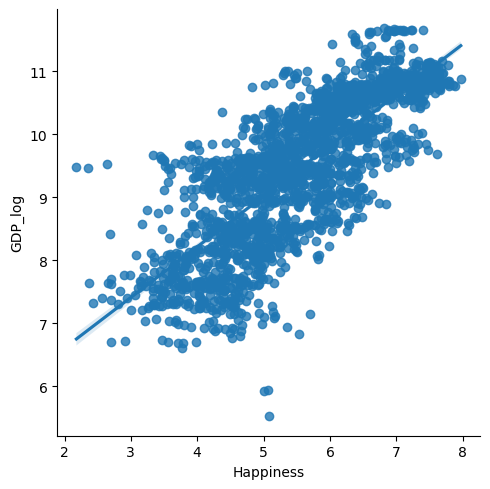

In [42]:
# Create a scatterplot for the "Happiness" and "GDP_log"
sns.lmplot(x = 'Happiness', y = 'GDP_log', data = df_wh_2)
plt.show()

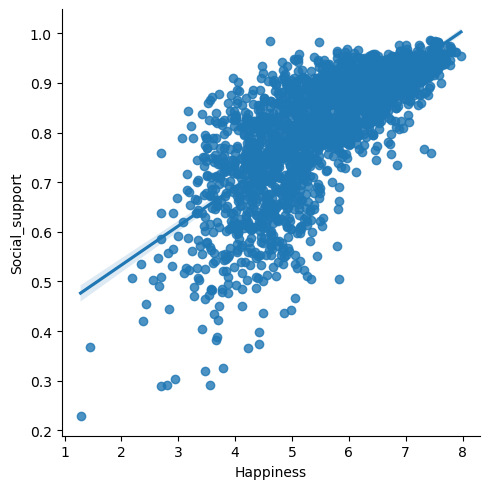

In [43]:
# Create a scatterplot for the "Happiness" and "Social_support"
sns.lmplot(x = 'Happiness', y = 'Social_support', data = df_wh_2)
plt.show()

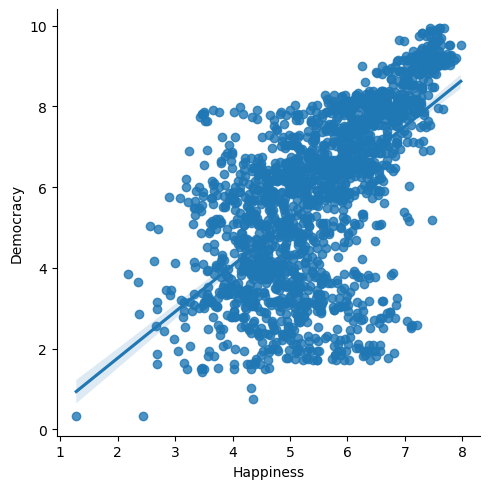

In [44]:
# Create a scatterplot for the "Happiness" and "Democracy" 
sns.lmplot(x = 'Happiness', y = 'Democracy', data = df_wh_2)
plt.show()

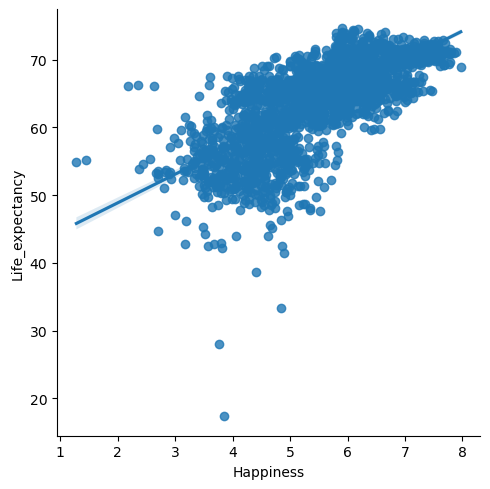

In [45]:
# Create a scatterplot for the "Happiness" and "Life_expectancy"
sns.lmplot(x = 'Happiness', y = 'Life_expectancy', data = df_wh_2)
plt.show()

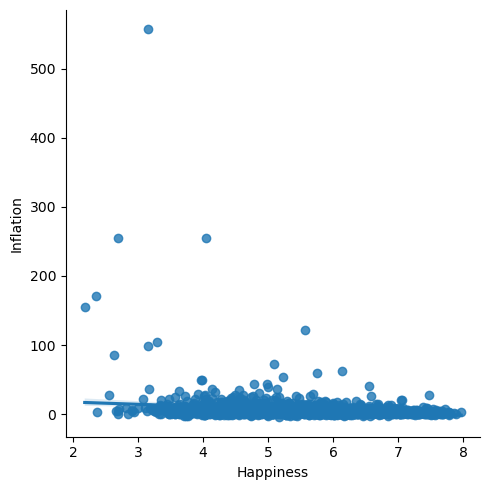

In [46]:
# Create a scatterplot for the "Happiness" and "Inflation"
sns.lmplot(x = 'Happiness', y = 'Inflation', data = df_wh_2)
plt.show()

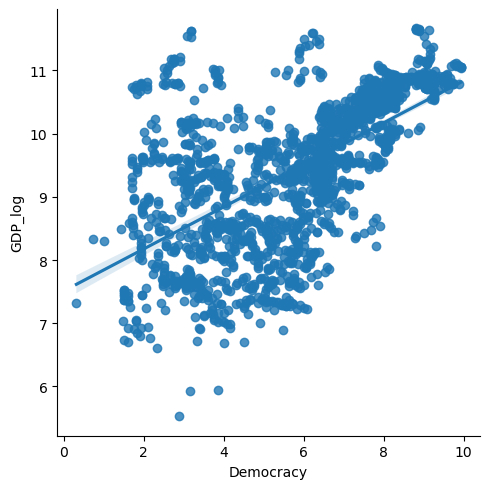

In [47]:
# Create a scatterplot for the "Democracy" and "GDP_log"
sns.lmplot(x = 'Democracy', y = 'GDP_log', data = df_wh_2)
plt.show()

### 04.04. Pair plots

In [49]:
# Variables for pair plot
df_wh_3 =  df_wh_2[['Happiness', 'GDP_log', 'Social_support', 'Life_expectancy', 'Democracy', 'Inflation']]

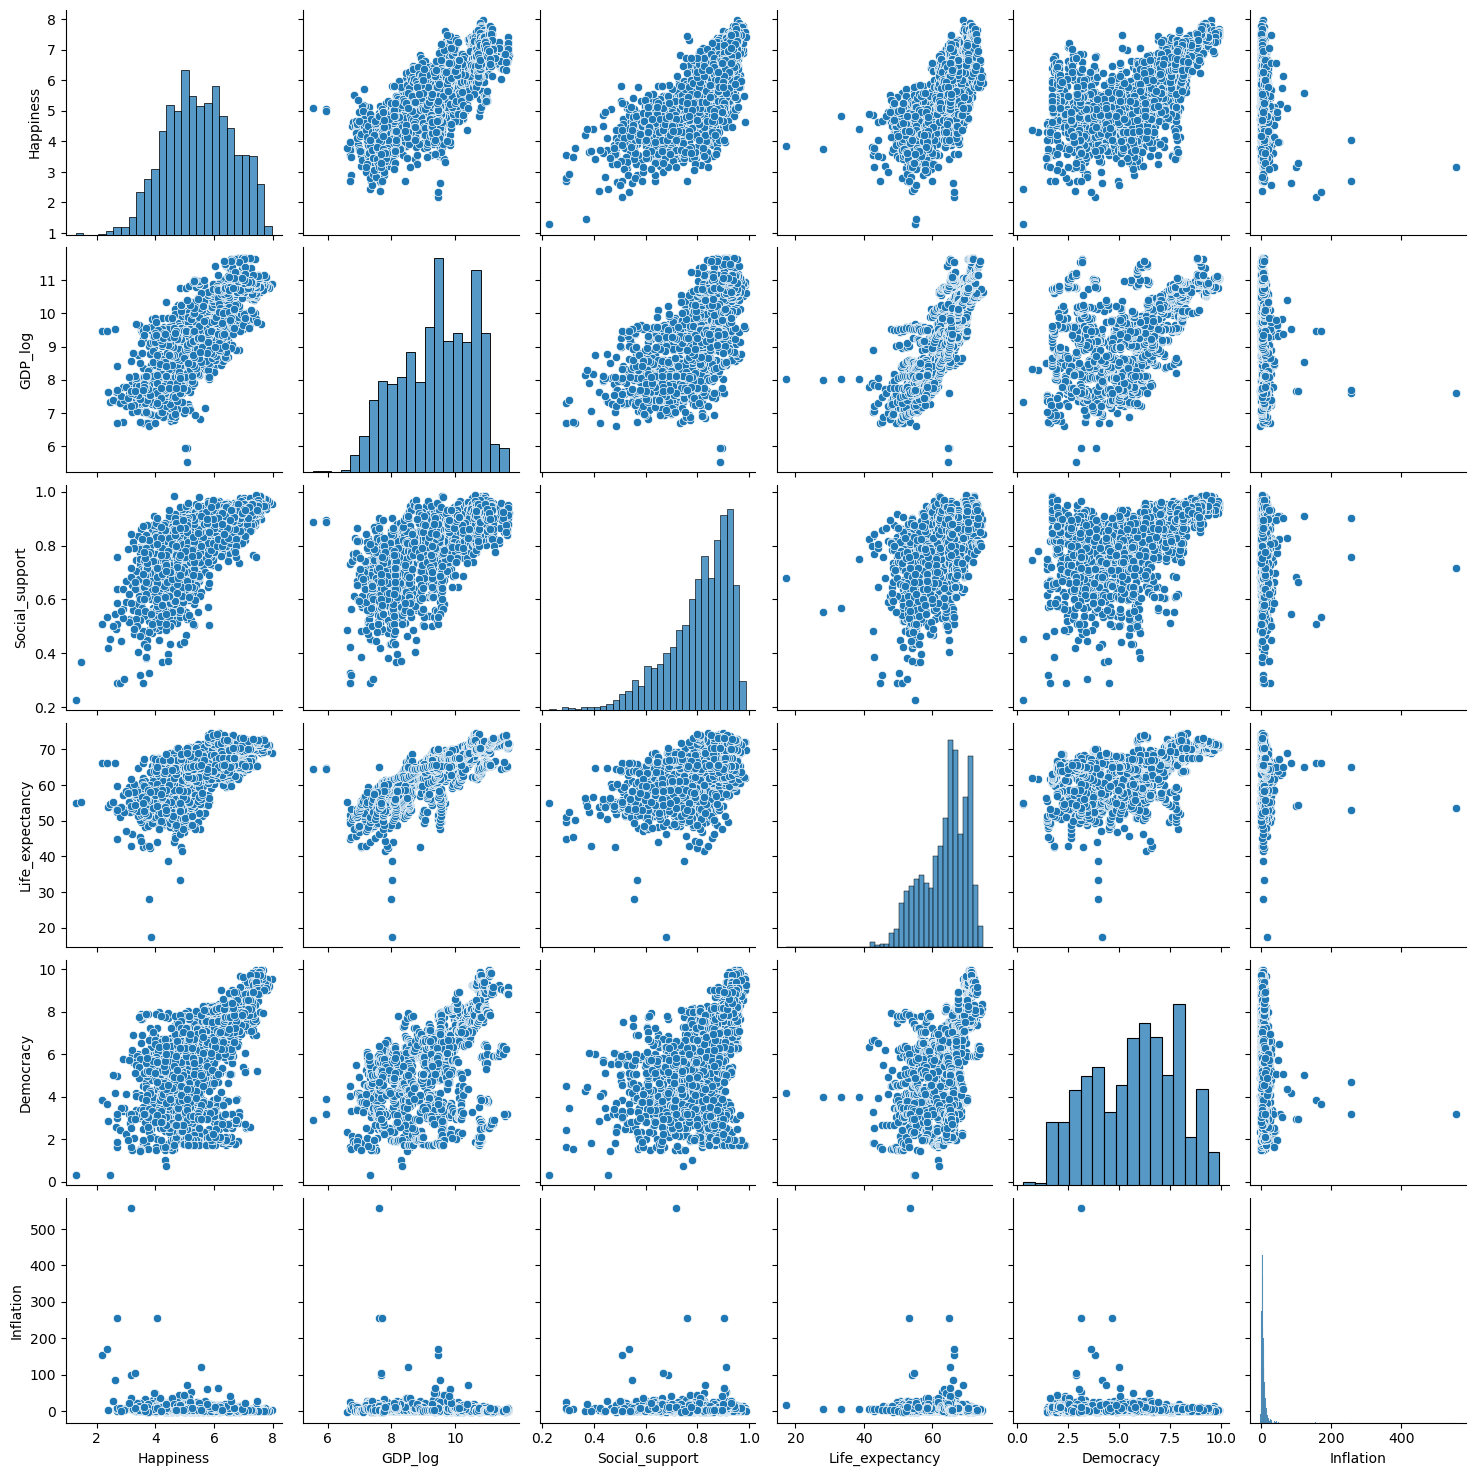

In [50]:
# Create a pair plot 
g = sns.pairplot(df_wh_3)
plt.show()

The primary goal of this project is to find out whether the government regime or the economy make people more happy. The secondary goal is what other factors are important contributors for happiness.

Given the lack of correlation it would seem logical to drop **inflation** as a variable for further investigation at this point. However, because of the great variance in the inflation data I will use the categorical plots to explore further, whether there is correlation within some bands of inflation. 

At this point I will continue with all six variables since they directly pertain to the project goals.

### 04.05 Categorical Plots

##### 04.05.01. Assigning categories

**Assign categories for inflation rates**

In [55]:
df_wh_3 = df_wh_3.copy()

In [56]:
# Deflation: Below 0%
df_wh_3.loc[df_wh_3['Inflation'] < 0, 'Inflation_cat'] = 'Deflation'

In [57]:
# Very Low Inflation: 0% to 2%
df_wh_3.loc[(df_wh_3['Inflation'] >= 0) & (df_wh_3['Inflation'] < 2), 'Inflation_cat'] = 'Very Low Inflation'

In [58]:
# Low Inflation: 2% to 5%
df_wh_3.loc[(df_wh_3['Inflation'] >= 2) & (df_wh_3['Inflation'] < 5), 'Inflation_cat'] = 'Low Inflation'

In [59]:
# Moderate Inflation: 5% to 10%
df_wh_3.loc[(df_wh_3['Inflation'] >= 5) & (df_wh_3['Inflation'] < 10), 'Inflation_cat'] = 'Moderate Inflation'

In [60]:
# High Inflation: 10% to 20%
df_wh_3.loc[(df_wh_3['Inflation'] >= 10) & (df_wh_3['Inflation'] < 20), 'Inflation_cat'] = 'High Inflation'

In [61]:
# Very High Inflation: 20% to 50%
df_wh_3.loc[(df_wh_3['Inflation'] >= 20) & (df_wh_3['Inflation'] < 50), 'Inflation_cat'] = 'Very High Inflation'

In [62]:
# Hyperinflation: Above 50%
df_wh_3.loc[df_wh_3['Inflation'] >= 50, 'Inflation_cat'] = 'Hyperinflation'

In [63]:
# Display the count of entries in each category
df_wh_3['Inflation_cat'].value_counts(dropna=False)

Inflation_cat
Low Inflation          570
Very Low Inflation     426
Moderate Inflation     411
NaN                    377
High Inflation         176
Deflation              123
Very High Inflation     49
Hyperinflation          13
Name: count, dtype: int64

**Assign categories for GDP_log**

In [65]:
# GDP_log: Below 7.50
df_wh_3.loc[df_wh_3['GDP_log'] < 7.5, 'GDP_cat'] = 'Very Low GDP'

In [66]:
# GDP_log: 7.50 to 9.00
df_wh_3.loc[(df_wh_3['GDP_log'] >= 7.5) & (df_wh_3['GDP_log'] < 9.00), 'GDP_cat'] = 'Low GDP'

In [67]:
# GDP_log: 9.00 to 10.50
df_wh_3.loc[(df_wh_3['GDP_log'] >= 9.0) & (df_wh_3['GDP_log'] < 10.50), 'GDP_cat'] = 'Medium GDP'

In [68]:
# GDP_log: Above 10.50
df_wh_3.loc[df_wh_3['GDP_log'] > 10.5, 'GDP_cat'] = 'High GDP'

**Assign categories for democracy values**

Mapping taken from the Democracy Index of the Economist Intelligence Unit

In [71]:
# Democracy Score: Below 4.00
df_wh_3.loc[df_wh_3['Democracy'] < 4.0, 'Regime'] = 'Authoritarian regime'

In [72]:
# Democracy Score: 4.00 to 6.00
df_wh_3.loc[(df_wh_3['Democracy'] >= 4.0) & (df_wh_3['Democracy'] < 6.00), 'Regime'] = 'Hybrid regime'

In [73]:
# Democracy Score: 4.00 to 6.00
df_wh_3.loc[(df_wh_3['Democracy'] >= 6.0) & (df_wh_3['Democracy'] < 8.00), 'Regime'] = 'Flawed democracy'

In [74]:
# Democracy Score: Above 8.00
df_wh_3.loc[df_wh_3['Democracy'] > 8.0, 'Regime'] = 'Full democracy'

In [75]:
# Display the count of entries in each category
df_wh_3['Regime'].value_counts(dropna=False)

Regime
Flawed democracy        622
Authoritarian regime    471
Hybrid regime           459
Full democracy          299
NaN                     294
Name: count, dtype: int64

#### 04.05.02. Categorical visualizations

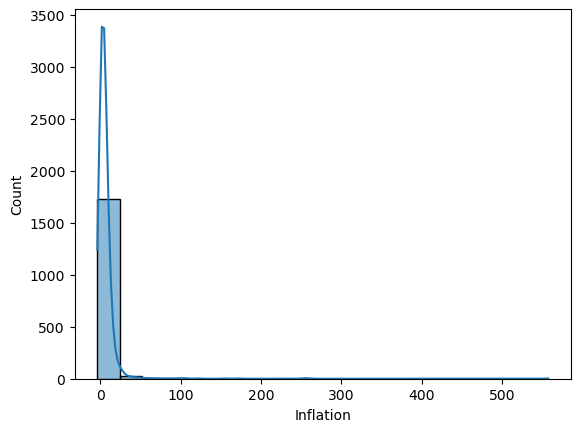

In [77]:
# Histogram for inflation
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_wh_3['Inflation'], bins = 20, kde = True)
plt.show()

In [78]:
df_wh_3.describe()

,Happiness,GDP_log,Social_support,Life_expectancy,Democracy,Inflation
count,2145.000000,2119.000000,2134.000000,2086.000000,1854.000000,1768.000000
mean,5.486447,9.414251,0.807228,63.584461,5.766828,6.203946
std,1.126571,1.150054,0.122006,6.638456,2.126861,18.227375
min,1.281000,5.527000,0.228000,17.360000,0.320000,-3.749145
25%,4.647000,8.521000,0.741000,59.400000,3.940000,1.589898
50%,5.465000,9.518000,0.832000,65.210000,5.990000,3.466150
75%,6.325000,10.405000,0.903000,68.715000,7.530000,6.913544
max,7.971000,11.676000,0.987000,74.600000,9.930000,557.201817


**Observation**: The extreme outliers in Inflation need to be addressed.

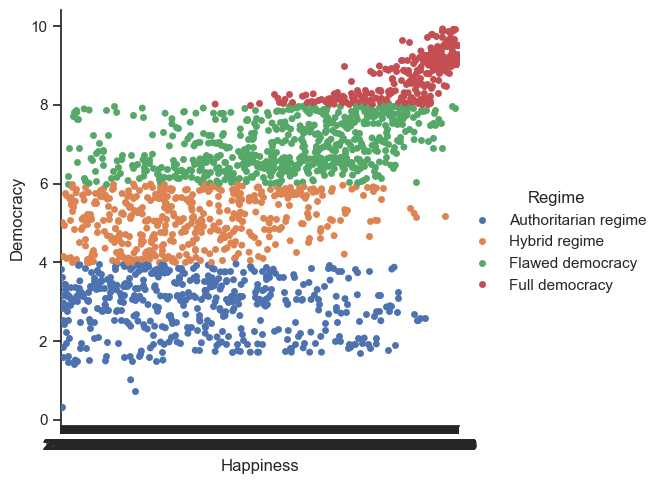

In [80]:
# Create a categorical plot in seaborn for Regime, Democarcy and Happiness
sns.set(style="ticks")
g = sns.catplot(x="Happiness", y="Democracy", hue="Regime", data=df_wh_3)
plt.show()

**Observation**: As we already know from the positive correlation (0.61), people in countries with stronger democracies are generally happier than in weaker democracies. However there is a fair amount of overlap even between the authoritarian regimes and full democracies. In other words: We have some **democracies with people who are far less happy than in some autocracies** and vice versa. 

It is worth noting that this charts visualizes data for all years (2008-2017). **It could be interesting to look at whether the picture changes on a per-year basis.**

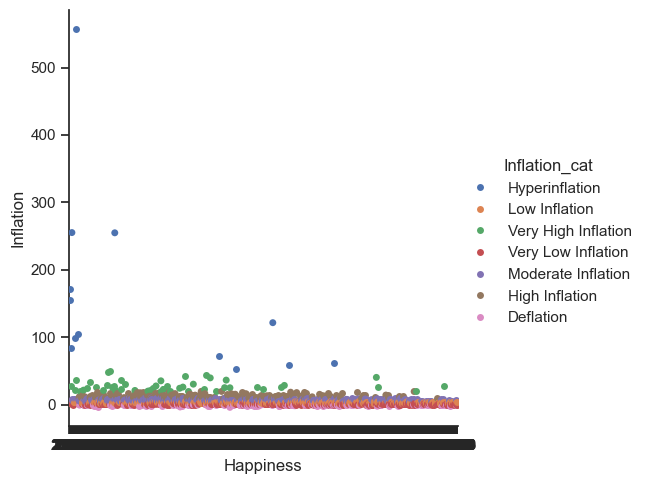

In [82]:
# Create a categorical plot in seaborn using Happiness, Inflation and Inflation Category
sns.set(style="ticks")
g = sns.catplot(x="Happiness", y="Inflation", hue="Inflation_cat", data=df_wh_3)
plt.show()

**To-do** Chart is unreadable because of outliers.

In [84]:
#Exclude outliers with extreme inflation values based on IQR (calculated outside Python and rounded to next decimal)
df_filtered_inflation = df_wh_3[df_wh_3['Inflation'] <= 15]

In [85]:
df_filtered_inflation 

,Happiness,GDP_log,Social_support,Life_expectancy,Democracy,Inflation,Inflation_cat,GDP_cat,Regime
2,4.758,7.614,0.539,51.100,2.48,2.178538,Low Inflation,Low GDP,Authoritarian regime
3,3.832,7.581,0.521,51.400,2.48,11.804186,High Inflation,Low GDP,Authoritarian regime
4,3.783,7.661,0.521,51.700,2.48,6.441213,Moderate Inflation,Low GDP,Authoritarian regime
5,3.572,7.680,0.484,52.000,2.48,7.385772,Moderate Inflation,Low GDP,Authoritarian regime
6,3.131,7.671,0.526,52.300,2.77,4.673996,Low Inflation,Low GDP,Authoritarian regime
...,...,...,...,...,...,...,...,...,...
2353,4.184,7.748,0.766,50.000,2.78,-0.197785,Deflation,Low GDP,Authoritarian regime
2354,3.703,7.747,0.736,51.200,3.05,-2.430968,Deflation,Low GDP,Authoritarian regime
2355,3.735,7.735,0.768,51.675,3.05,-1.543670,Deflation,Low GDP,Authoritarian regime
2356,3.638,7.754,0.754,52.150,3.16,0.893962,Very Low Inflation,Low GDP,Authoritarian regime


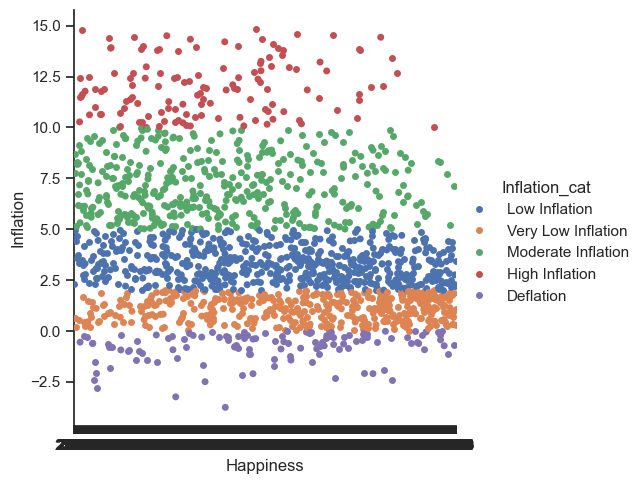

In [86]:
# Create a categorical plot in seaborn for Happiness, Inflation and Inflation category using df_filtered_inflation
sns.set(style="ticks")
g = sns.catplot(x="Happiness", y="Inflation", hue="Inflation_cat", data=df_filtered_inflation)
plt.show()

**Observation**: The pattern of happiness appears to stay the same within each band of the inflation-category. I.e. inflation does not appear to influence happiness more strongly in high-inflation countries than in low-inflation countries.

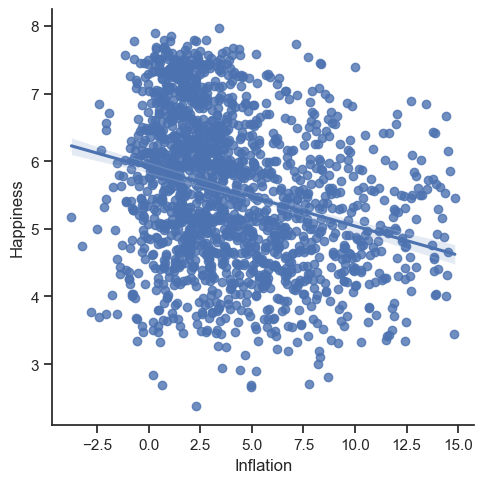

In [88]:
# Create a scatterplot for the "Inflation" and "Happiness" using the filtered data
sns.lmplot(x = 'Inflation', y = 'Happiness', data = df_filtered_inflation)
plt.show()

In [89]:
# Create a correlation matrix using pandas for the new, filtered Inflation data
new_correlation_matrix = df_filtered_inflation[['Happiness', 'GDP_log', 'Inflation', 'Democracy']].corr()

In [90]:
new_correlation_matrix

,Happiness,GDP_log,Inflation,Democracy
Happiness,1.000000,0.796235,-0.272111,0.616222
GDP_log,0.796235,1.000000,-0.330704,0.619941
Inflation,-0.272111,-0.330704,1.000000,-0.257096
Democracy,0.616222,0.619941,-0.257096,1.000000


**Observation** Analysing the inflation data without the outliers made the visualisations readable but did not change the statistical analysis significantly. However, inflation rate has only a weak correlation with happiness, unlike GDP, which has a strong correlation. 

**At this point we can conclude that a high income contributes more to happiness than whether that income is affected by inflation.** 

## 05. Export data

In [93]:
#Export Data as Pickle
df_wh_3.to_pickle(os.path.join(path, '01 Data','Prepared Data', 'dataset-2024-12-05.pkl'))

## 06. Hypotheses and additional research questions

**Additional research questions**
<ul>
<li>What are similarities and differences between regimes at opposing end of the democracy-scale that share similar happiness-scores? In other words: why are some democracies as (un)happy as some autocracies?</li>
<li>Does time play a role in how happiness scores changed?</li>    
<li>Does time play a role in how happiness correllations have changed? In other words: have the things that make us happy changed over time?</li>    
</ul>

**Hypotheses**
<ul>
<li>It’s the economy: People in high-gdp-countries are happier than in low gdp-countries.</li>
<li>It’s democracy: People in democratic countries are happier than in autocratic countries. </li>
<li>It’s inflation: People's happiness is more influenced by how much their income changes than by how much they earn. </li>
<li>The economy is more important than democracy: happiness is influenced more by economic factors than by the political regime (even though they are interdependent).</li>
<li>At least we are healthy: Health contributes more to happiness than regime or gdp.</li>
</ul>